## Observations and Insights 

1. While being treated with Capomulin, mouse weight was strongly coorelated (r value = 0.70) with tumor volume.
2. Capomulin seemed to successfully treat mouse s185, as it can be seen that the tumor volume decreased over time.
3. Of the 4 drugs analyzed, Capomulin and Ramicane had lower tumor volumes at the end of the study than Infubinol and Ceftamin.  While we did not look at the starting volume in this box plot, it is likely that Capomulin and Ramicane are more successful then Infubinol and Ceftamin, although that would be have to be analyzed further to determine the validity of that statement.

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
total_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = total_data['Mouse ID'].nunique()

In [3]:
total_data.shape

(1893, 8)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = total_data.duplicated(subset=['Mouse ID', 'Timepoint'])

duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = False)

clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].nunique()
total_mice


249

In [7]:
clean_df.shape

(1883, 8)

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
stdev_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
tumorv_summary = pd.DataFrame({
    "Tumor Volume Mean (mm3)": mean_tvolume,
    "Tumor Volume Median (mm3)": median_tvolume,
    "Tumor Volume Standard Deviation": stdev_tvolume,
    "Tumor Volume Standard Error": sem_tvolume})
tumorv_summary

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.458254,50.854632,6.637293,0.540135
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

In [9]:
#Create dataframe to hold mice per drug trial
mice_perdrug = clean_df.groupby(['Drug Regimen'])['Mouse ID'].nunique()
mice_perdrug_summary = pd.DataFrame({"Mice in trial": mice_perdrug})
mice_perdrug_summary


,Mice in trial
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


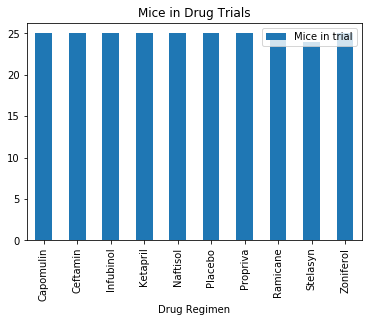

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pandas_bar = mice_perdrug_summary.plot(kind='bar', title="Mice in Drug Trials")
pandas_bar


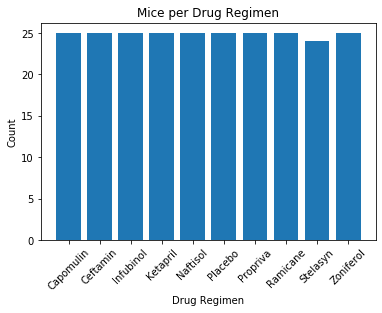

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#set x axis
x_axis_bar = np.arange(len(mice_perdrug))

#set tick locations
tick_loc_bar = [value for value in x_axis_bar]

#create bar
plt.bar(x_axis_bar, mice_perdrug)
plt.xticks(tick_loc_bar, list(mice_perdrug.index), rotation = 45)

#title and labels
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

#show
plt.show()

In [12]:
#Create dataframe to hold male and female counts
gender_count = clean_df['Sex'].value_counts()
gender_count

Male      958
Female    925
Name: Sex, dtype: int64

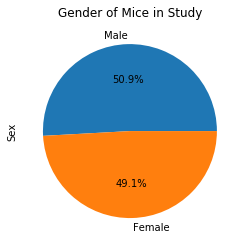

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind = 'pie', y = 'Sex', title = "Gender of Mice in Study", autopct = '%1.1f%%')
plt.show()


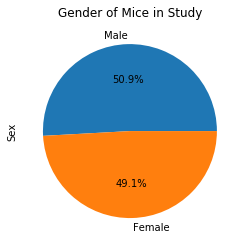

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create gender variable
gender = list(gender_count.index.values)

plt.pie(gender_count, labels=gender, autopct = '%1.1f%%')
plt.title("Gender of Mice in Study")
plt.ylabel("Sex")
#show
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_sort = clean_df.sort_values(['Timepoint'], ascending = True)
time_sort


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1077,k862,Stelasyn,Female,13,25,0,45.000000,0
1087,k894,Zoniferol,Female,13,29,0,45.000000,0
255,q610,Ramicane,Female,18,21,0,45.000000,0
1097,l215,Propriva,Male,10,29,0,45.000000,0
...,...,...,...,...,...,...,...,...
360,g316,Capomulin,Female,22,22,45,40.159220,2
716,c766,Placebo,Female,13,26,45,69.823146,4
94,j913,Ramicane,Female,4,17,45,31.560470,1
1193,m550,Ketapril,Male,18,28,45,69.253503,4


In [16]:
endpoint_tumor = time_sort.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep = 'last')

endpoint_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1163,l872,Placebo,Male,19,30,0,45.000000,0
1315,o848,Stelasyn,Female,14,27,0,45.000000,0
1216,n482,Propriva,Female,4,29,0,45.000000,0
938,h428,Ketapril,Female,1,27,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
360,g316,Capomulin,Female,22,22,45,40.159220,2
716,c766,Placebo,Female,13,26,45,69.823146,4
94,j913,Ramicane,Female,4,17,45,31.560470,1
1193,m550,Ketapril,Male,18,28,45,69.253503,4


In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = pd.merge(endpoint_tumor, clean_df, on=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"])
tumor_merge

,Mouse ID,Drug Regimen,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3),Metastatic Sites_x,Sex_y,Age_months_y,Weight (g)_y,Metastatic Sites_y
0,l872,Placebo,Male,19,30,0,45.000000,0,Male,19,30,0
1,o848,Stelasyn,Female,14,27,0,45.000000,0,Female,14,27,0
2,n482,Propriva,Female,4,29,0,45.000000,0,Female,4,29,0
3,h428,Ketapril,Female,1,27,0,45.000000,0,Female,1,27,0
4,b447,Ceftamin,Male,2,30,0,45.000000,0,Male,2,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,g316,Capomulin,Female,22,22,45,40.159220,2,Female,22,22,2
245,c766,Placebo,Female,13,26,45,69.823146,4,Female,13,26,4
246,j913,Ramicane,Female,4,17,45,31.560470,1,Female,4,17,1
247,m550,Ketapril,Male,18,28,45,69.253503,4,Male,18,28,4


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin',
 'Ramicane',
 'Infubinol',
 'Ceftamin']
treatment_list


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [19]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

for drug in treatment_list:

    tumor_volumes = tumor_merge.loc[tumor_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


    print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")


Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
--------------------------------------------------------
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values 

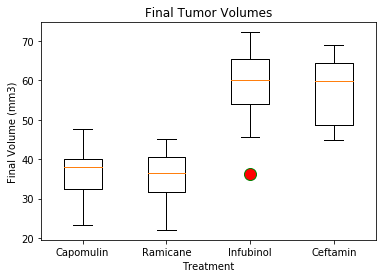

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title('Final Tumor Volumes')
plt.ylabel("Final Volume (mm3)")
plt.xlabel('Treatment')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(tumor_volume, labels=treatment_list, flierprops=flierprops)

plt.show()



## Line and Scatter Plots

In [22]:
#Create capomulin df
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [23]:
#create mouse df
capomulin_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


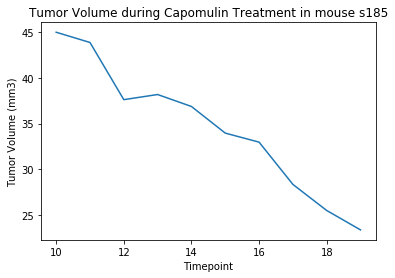

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis_line = (capomulin_mouse.index.values)
y_axis_line = capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_axis_line, y_axis_line)
plt.title("Tumor Volume during Capomulin Treatment in mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

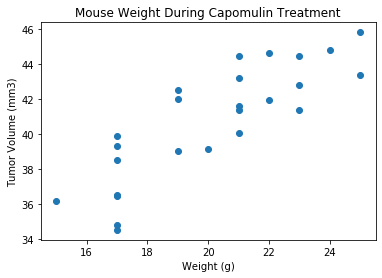

In [36]:
capomulin_mean = capomulin_df.groupby(['Mouse ID']).mean()
x_axis_scatter = capomulin_mean['Weight (g)']
y_axis_scatter = (capomulin_mean['Tumor Volume (mm3)'])

plt.scatter(x_axis_scatter, y_axis_scatter)
plt.title("Mouse Weight During Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_axis_scatter,y_axis_scatter)[0],2)}")

The correlation coefficient between mouse weight and tumor volume is 0.84


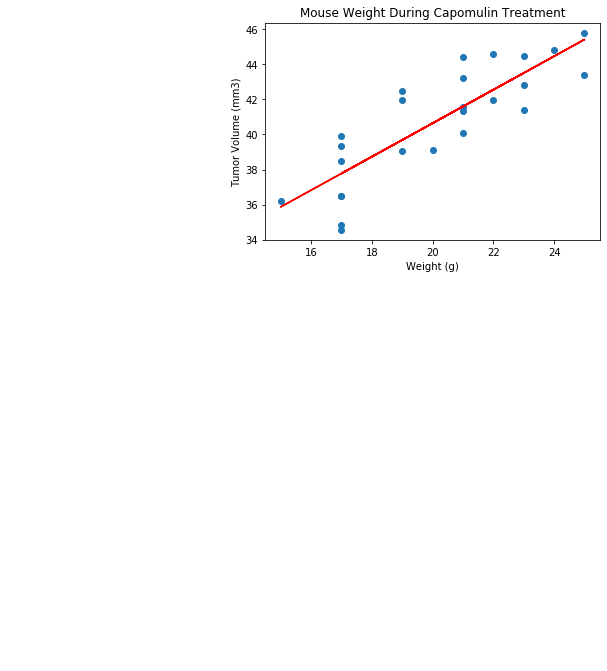

The r-squared is: 0.7088568047708717


In [27]:
# Calculate thelinear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis_scatter = capomulin_mean['Weight (g)']
y_axis_scatter = (capomulin_mean['Tumor Volume (mm3)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis_scatter, y_axis_scatter)

plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight During Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


print(f"The r-squared is: {rvalue**2}")

